# **World Happiness Data Analysis** 😊🗺️

## **Introduction** 🤵🏽‍♂️

Everybody desires to be happy in life and interestingly the requirements to be happy vary from person to person. We all invest different meanings in the concept of happiness. People give happiness different values at different part of our lives. However, there are some vital factors that are commonly regarded as the main ingredients to be happy in life. Physical and psychological sturdiness is very important to be happy and people can truly realize that when they get sick. Economic freedom - ability to fulfil the needs in life, is the another most important factor to be happy, in my opinion. It is always said that being happy with an empty stomach is not possible. Individual birth – right freedom is also considered a great influence to be happy in life. Someone without birth - right freedom cannot feel the happiness.
This analysis will evaluate a connection between people’s happiness and their countries. In my opinion, the location where we live is a huge factor of our happiness proportion. The World Happiness Report, produced by the United Nations, ranks about 146 countries by how happy their citizens see themselves to be. It’s based on factors including economic wealth, life expectancy, social support, freedom to make life choices and levels of government corruption.


- What is the highest and lowest country with Happiness_score?
- What is the highest and lowest continent with Happiness_score?
- What is the most effective variable in Happiness_score?
- Is there a correlation between Happiness_score and Social Support?

## **Import libraries** ⚙️

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
from geopy.geocoders import Nominatim
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as ssd
import  statsmodels.stats.outliers_influence as oi

## **Read the dataset** 📖

In [2]:
happy = pd.read_csv("D:\\ERU\\Level 3\\Data Analysis\\Project\\happy_clean.csv")

In [3]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RANK                       146 non-null    int64  
 1   Country                    146 non-null    object 
 2   Happiness_score            146 non-null    float64
 3   Whisker_high               146 non-null    float64
 4   Whisker_low                146 non-null    float64
 5   Dystopia_1.83_residual     146 non-null    float64
 6   GDP_per_capita             146 non-null    float64
 7   Social_support             146 non-null    float64
 8   Healthy_life_expectancy    146 non-null    float64
 9   Freedom                    146 non-null    float64
 10  Generosity                 146 non-null    float64
 11  Perceptions_of_corruption  146 non-null    float64
 12  continent                  146 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 

In [4]:
happy.head()

,RANK,Country,Happiness_score,Whisker_high,Whisker_low,Dystopia_1.83_residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,continent
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Europe
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Europe
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Europe


## **Visualizations** 📊

### **Bar chart for Top 5 Countries by Happiness Score** 😊🗺️

In [5]:
top_5_countries = happy.head(5)
fig = px.bar(top_5_countries, x='Country', y='Happiness_score', title='Top 5 Countries by Happiness Score')
fig.show()

### **Bar chart for Lowest 5 Countries by Happiness Score** 🗺️💁🏽‍♂️

In [6]:
low_5_countries = happy.tail(5)
fig = px.bar(low_5_countries, x='Country', y='Happiness_score', title='Lowest 5 Countries by Happiness Score')
fig.show()

### **Maps** 🗺️

#### **Add ISO code to the dataset**

In [7]:
data = happy["Country"]
df = pd.DataFrame(data)

# Function to get ISO code based on country name
def get_iso_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        # Handle the case where the country name is not found
        return None

# Add a column for ISO code
df['ISO_Code'] = df['Country'].apply(get_iso_code)

# Display the updated DataFrame
print(df)

SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='GN-ML', country_code='GN', name='Mali', parent='L', parent_code='GN-L', type='Prefecture')
         Country ISO_Code
0        Finland      FIN
1        Denmark      DNK
2        Iceland      ISL
3    Switzerland      CHE
4    Netherlands      NLD
..           ...      ...
141    Botswana*     None
142      Rwanda*     None
143     Zimbabwe      ZWE
144      Lebanon      LBN
145  Afghanistan      AFG

[146 rows x 2 columns]


In [8]:
happy_loc = pd.concat([df["ISO_Code"],happy],axis=1)
happy_loc

,ISO_Code,RANK,Country,Happiness_score,Whisker_high,Whisker_low,Dystopia_1.83_residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,continent
0,FIN,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,DNK,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Europe
2,ISL,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Europe
3,CHE,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,NLD,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,None,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102,Africa
142,None,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544,Africa
143,ZWE,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105,Africa
144,LBN,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034,Asia


In [9]:
cont = happy_loc[["RANK", "continent"  ,  "Happiness_score"]]

In [10]:
cont_group =cont.groupby('continent').mean()
cont_group["Happiness_score"].sort_values(ascending=False)

continent
Oceania          7.181000
Europe           6.469650
North America    6.288818
South America    5.788200
(Eurasia)        5.459000
Asia             5.343366
Africa           4.538488
Name: Happiness_score, dtype: float64

#### **Happiness Score map** 🌍

In [11]:
fig = px.choropleth(happy_loc,locations='ISO_Code', color='Happiness_score', hover_name='Country', color_continuous_scale='Agsunset',projection='natural earth',title='Happiness_score')

fig.update_layout(height=500, width=800)
fig.show()


#### **Asia map** 🌏

In [12]:
fig.update_geos(
    visible=False, resolution=110, scope="asia",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

#### **Africa map** 🌍

In [13]:
fig.update_geos(
    visible=False, resolution=110, scope="africa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

#### **Europe map** 🌍

In [14]:
fig.update_geos(
    visible=False, resolution=110, scope="europe",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

#### **north america** 🌎

In [15]:
fig.update_geos(
    visible=False, resolution=110, scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

#### **South america map** 🌎

In [16]:
fig.update_geos(
    visible=False, resolution=110, scope="south america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

### **Histograms** 📊

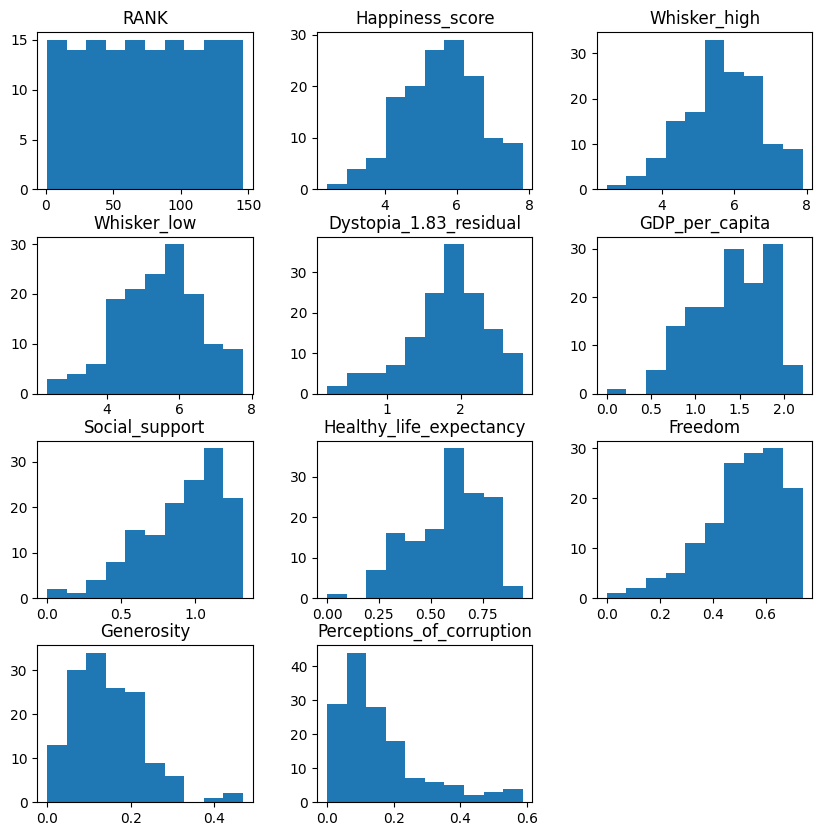

In [17]:
happy_loc.hist(figsize = (10,10), grid=False)
plt.show()

### **Boxplot** 📦

In [18]:
num_data = happy.select_dtypes(include="number")

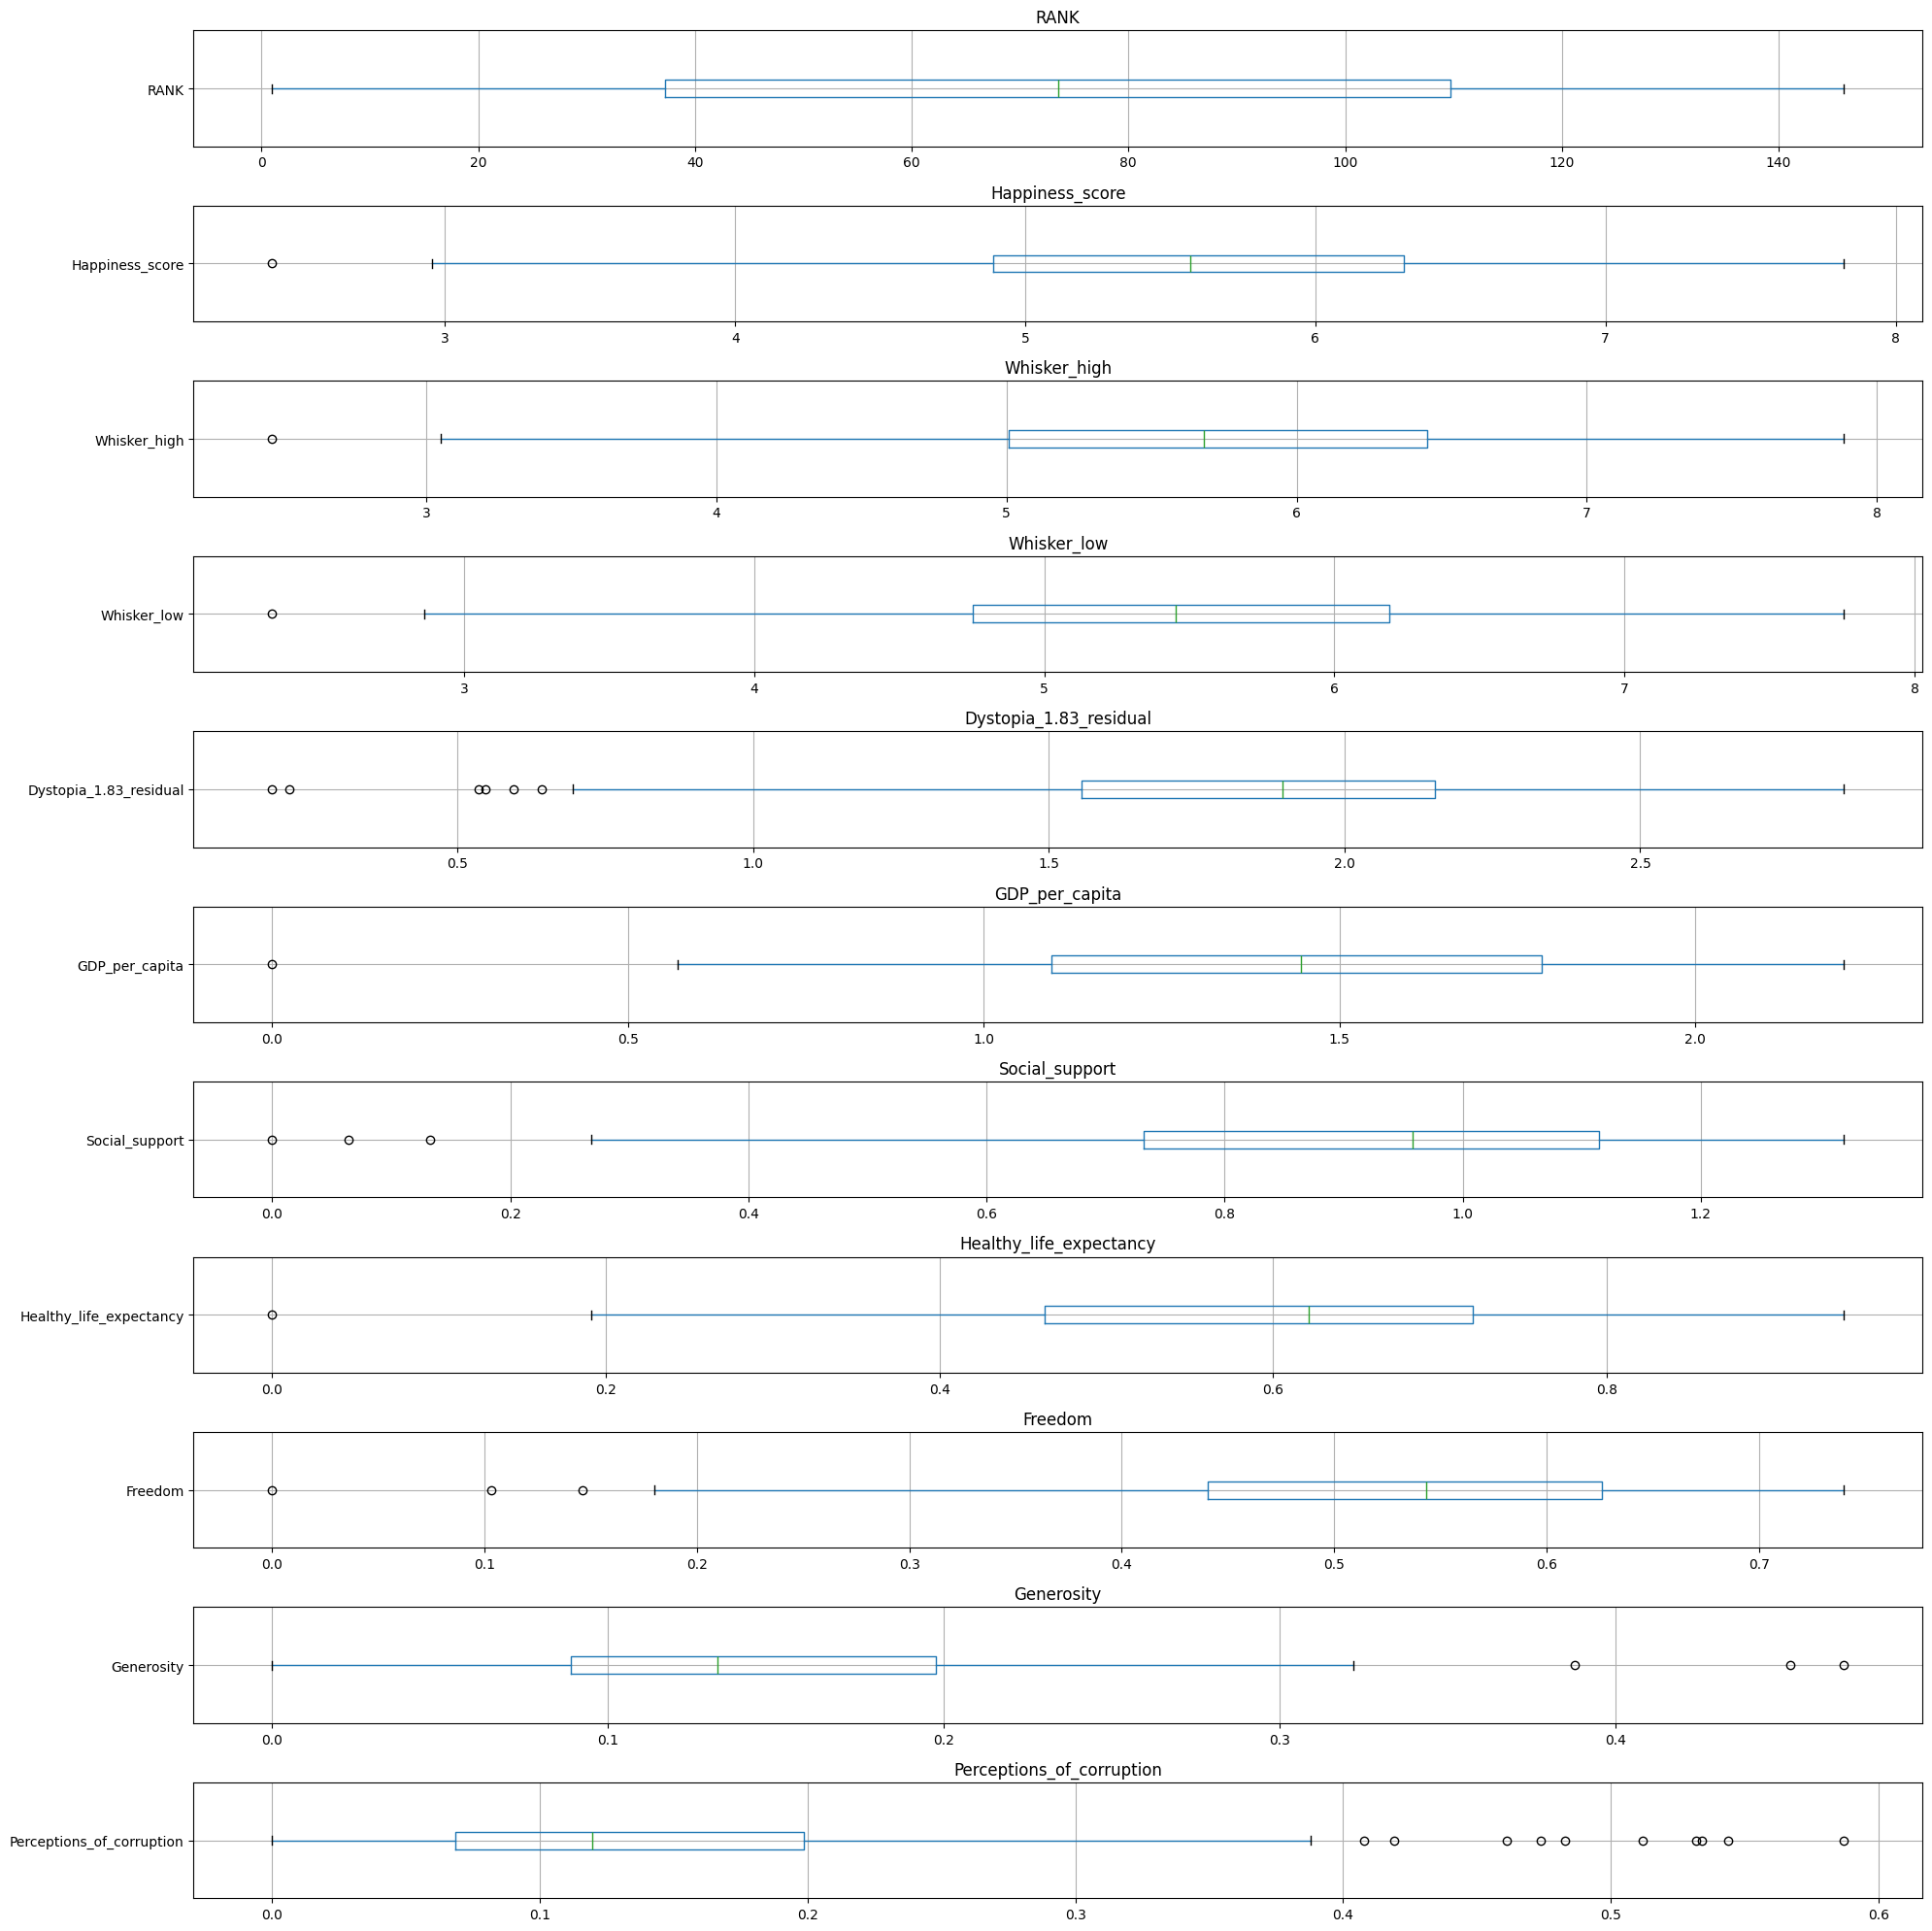

In [19]:
fig, axes = plt.subplots(nrows = len(num_data.columns), figsize = (20, 20), sharex = False)

for i, column in enumerate(num_data.columns):
    num_data.boxplot(column, ax=axes[i], vert = False)
    axes[i].set_title(column)
    
plt.tight_layout()
plt.show()

In [20]:
happy.describe()

,RANK,Happiness_score,Whisker_high,Whisker_low,Dystopia_1.83_residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


### **Scatter plot matrix**

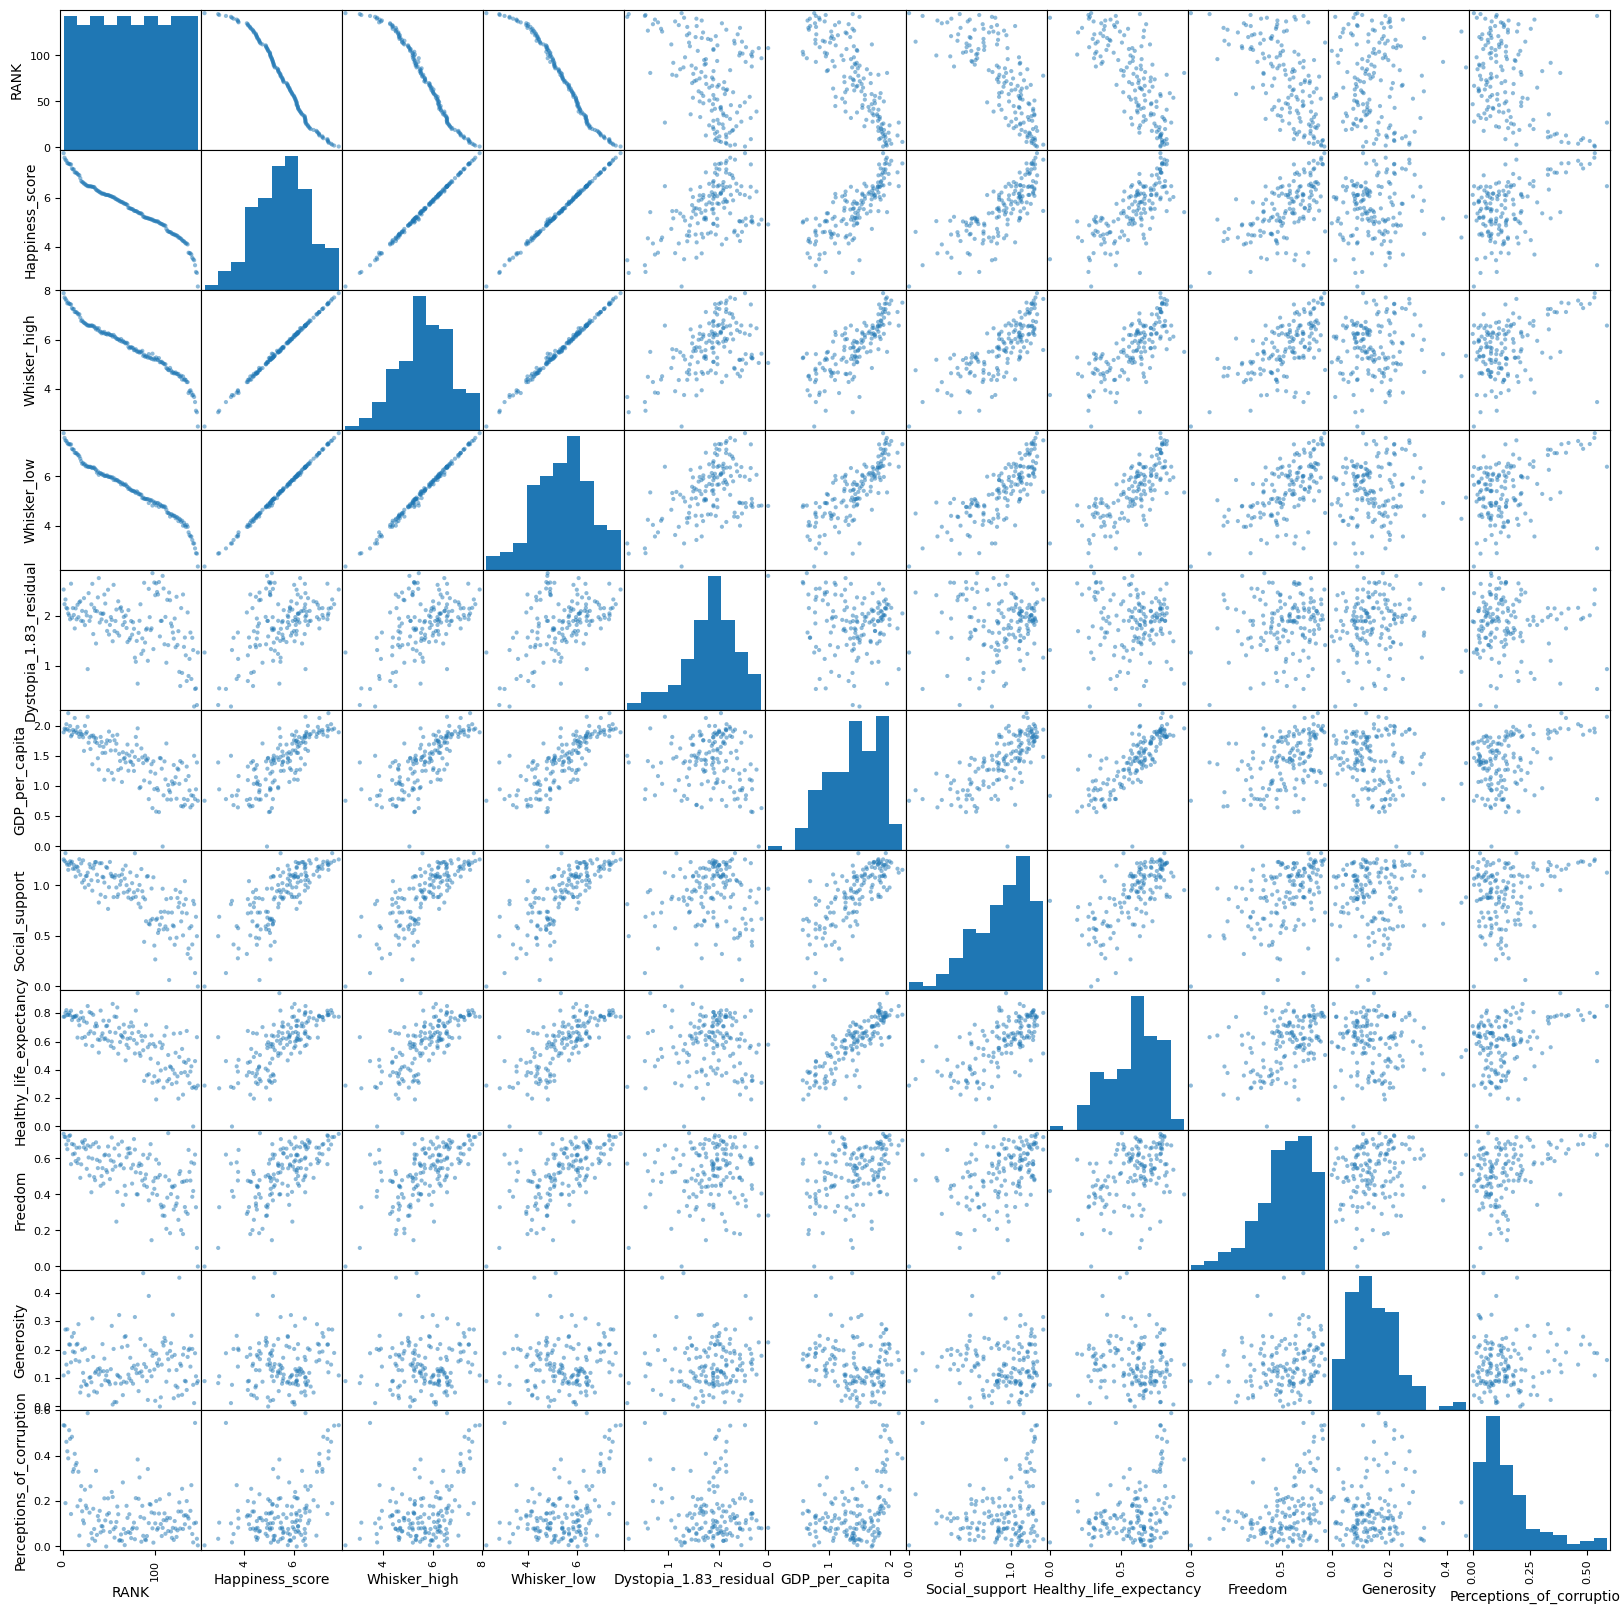

In [50]:
pd.plotting.scatter_matrix(happy, figsize=(20,20), diagonal= "hist")
plt.show()

- **Thir is a linear relationship betweem happiness_score  and Dystopia, GDP, Social_support, life_expectancy & freedom**
- **Thir is non-linear relationship between happiness_score and Generousity and perception_of_corruption**

### **Correlation Matrix**

C:\Users\ZeyadaNet\AppData\Local\Temp\ipykernel_852\3405325517.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



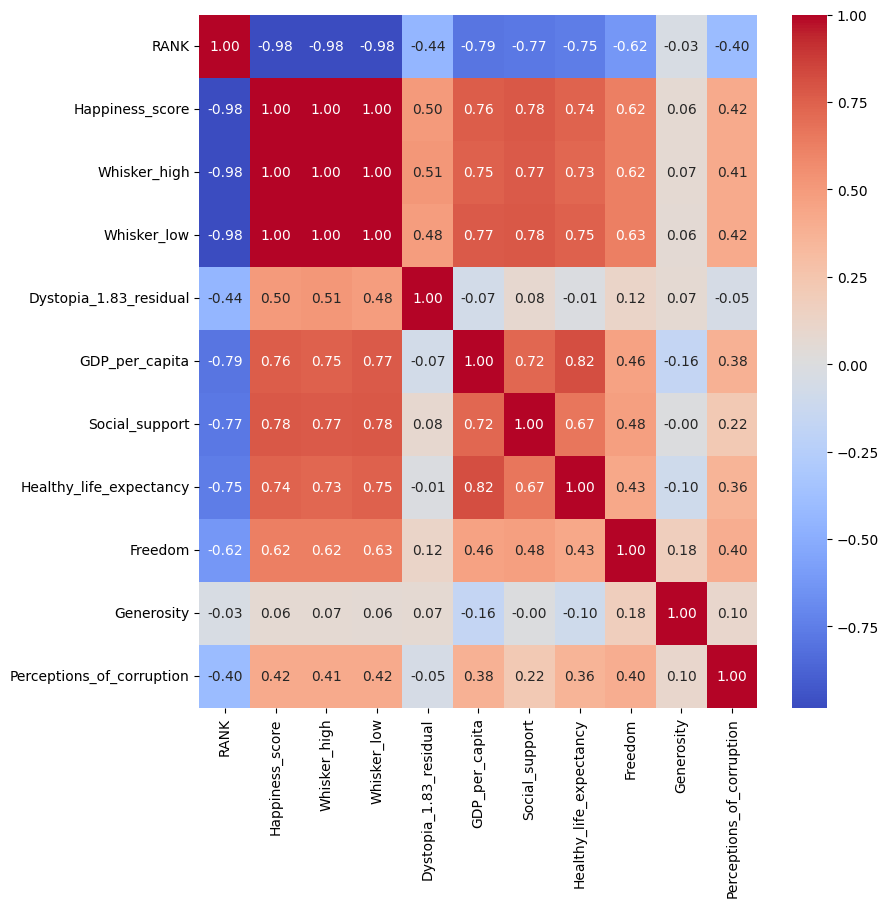

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(happy_loc.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

- **Happiness_score correlated with GDP, Social_support and Healthy_life_expectancy**

## **Models** 🔮

#### **Model - without transformation**

In [23]:
lm = smf.ols("Happiness_score ~  GDP_per_capita + Social_support + Healthy_life_expectancy + Freedom + Generosity + Perceptions_of_corruption", data = happy).fit()

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     79.20
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           2.16e-42
Time:                        13:19:07   Log-Likelihood:                -110.36
No. Observations:                 146   AIC:                             234.7
Df Residuals:                     139   BIC:                             255.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.6677      0.205      8.117      0.000       1.261       2.074
GDP_per_capita                0.5513      0.207      2.661      0.009       0.142       0.961
Social_support                1.4094      0.242      5.815      0.000       0.930       1.889
Healthy_life_expectancy       1.2735      0.441      2.885      0.005       0.401       2.146
Freedom                       1.6032      0.375      4.270      0.000       0.861       2.345
Generosity                    0.9689      0.568      1.705      0.090      -0.154       2.092
Perceptions_of_corruption     0.7305      0.396      1.843      0.068      -0.053       1.514
==============================================================================
Omnibus:                        9.121   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.350
Skew:                          -0.617   Prob(JB):                      0.00932
Kurtosis:                       3.113   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared and Adjusted R-squared:** The R-squared value is 0.774, indicating that approximately 77.4% of the variability in the dependent variable is explained by the model. The adjusted R-squared (0.764) accounts for the number of predictors in the model.


- **F-statistic and Prob (F-statistic):** The F-statistic tests the overall significance of the model. In this case, the F-statistic is 79.20 with a very low p-value (2.16e-42), suggesting that the model is statistically significant.


- **GDP_per_capita (0.5513):** For each one-unit increase in GDP per capita, the dependent variable  **(Happiness Score)** is expected to increase by **0.5513**, holding other variables constant.

- **Social_support (1.4094):** For each one-unit increase in Social Support, **(Happiness Score)** is expected to increase by **1.4094**, holding other variables constant.

- **Healthy_life_expectancy (1.2735):** For each one-unit increase in Healthy Life Expectancy, the **(Happiness Score)** is expected to increase by **1.2735**, holding other variables constant.

- **Freedom (1.6032):** For each one-unit increase in Freedom, the **(Happiness Score)** is expected to increase by **1.6032**, holding other variables constant.

- **Generosity (0.9689):** For each one-unit increase in Generosity, the **(Happiness Score)** is expected to increase by **0.9689**, holding other variables constant.

- **Perceptions_of_corruption (0.7305):** For each one-unit increase in Perceptions of Corruption, the **(Happiness Score)** is expected to increase by **0.7305**, holding other variables constant.

- **𝐻0: 𝛽1 = 𝛽2 = 0 Vs. 𝐻1: Not all 𝛽 s are zero**

Fail to reject a null hypothesis for Generosity & Perceptions_of_corruption

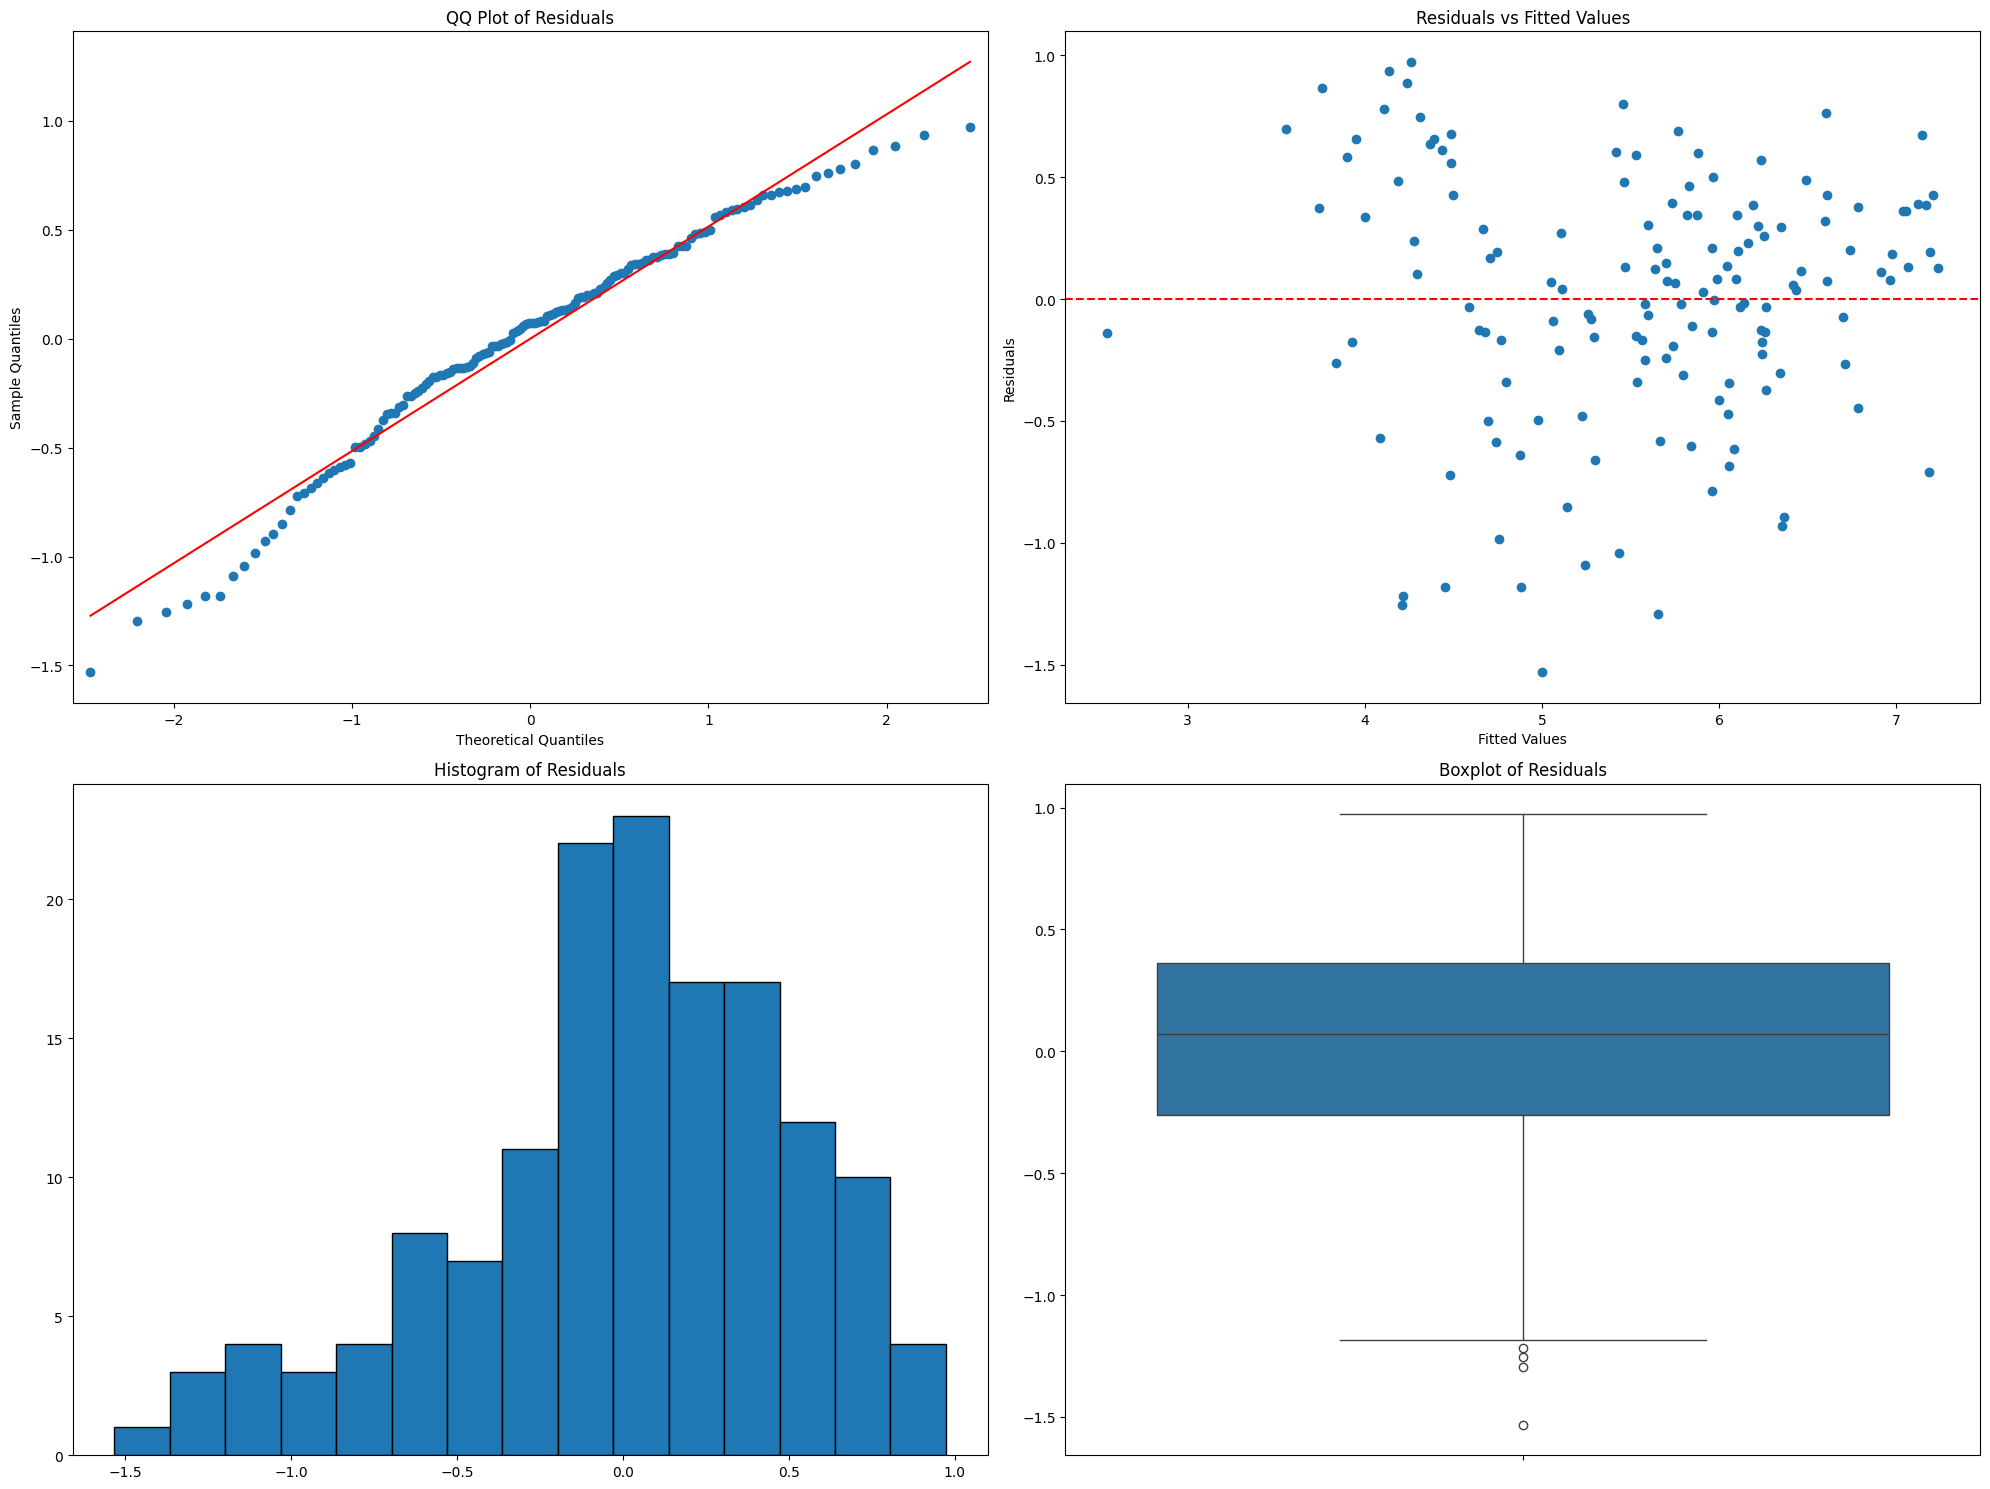

In [25]:
residuals = lm.resid
fitted = lm.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQplot** shows some deviation from the straight-line pattern indicating a distribution with **left skew** than a normal distribution.

- This plot of residuals versus fits shows that the residual variance **not equal**.


#### **Model - Trnasform X**

In [26]:
lm_trans_x = smf.ols("Happiness_score ~  np.log(GDP_per_capita + 1e-10) + np.log(Social_support + 1e-10) + np.log(Healthy_life_expectancy + 1e-10)", data = happy).fit()

In [27]:
lm_trans_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     14.17
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           3.96e-08
Time:                        13:19:09   Log-Likelihood:                -199.71
No. Observations:                 146   AIC:                             407.4
Df Residuals:                     142   BIC:                             419.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   5.7133      0.087     65.928      0.000       5.542       5.885
np.log(GDP_per_capita + 1e-10)              0.0825      0.041      2.016      0.046       0.002       0.163
np.log(Social_support + 1e-10)              0.1999      0.041      4.838      0.000       0.118       0.282
np.log(Healthy_life_expectancy + 1e-10)     0.1482      0.042      3.492      0.001       0.064       0.232
==============================================================================
Omnibus:                        1.298   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.357
Skew:                          -0.166   Prob(JB):                        0.507
Kurtosis:                       2.664   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared and Adjusted R-squared:** R-squared is 0.230, indicating that approximately **23%** of the variability in the dependent variable is explained by the model.
The **adjusted R-squared (0.214)** accounts for the number of predictors in the model.

- **F-statistic and Prob (F-statistic):** The F-statistic is 14.17 with a **very low p-value (3.96e-08)**, suggesting that the **model is statistically significant**.

- **log(GDP_per_capita):** A one-unit increase in the logarithm of GDP_per_capita is associated with a **0.0825** increase in the happiness score.

- **log(Social_support):** A one-unit increase in the logarithm of Social_support is associated with a **0.1999** increase in the happiness score.

- **log(Healthy_life_expectancy):** A one-unit increase in the logarithm of Healthy_life_expectancy is associated with a **0.1482** increase in the happiness score.

- **𝐻0: 𝛽1 = 𝛽2 = 0 Vs. 𝐻1: Not all 𝛽 s are zero**

- All coefficients have p-values less than **0.05**, suggesting that they are **statistically significant**.

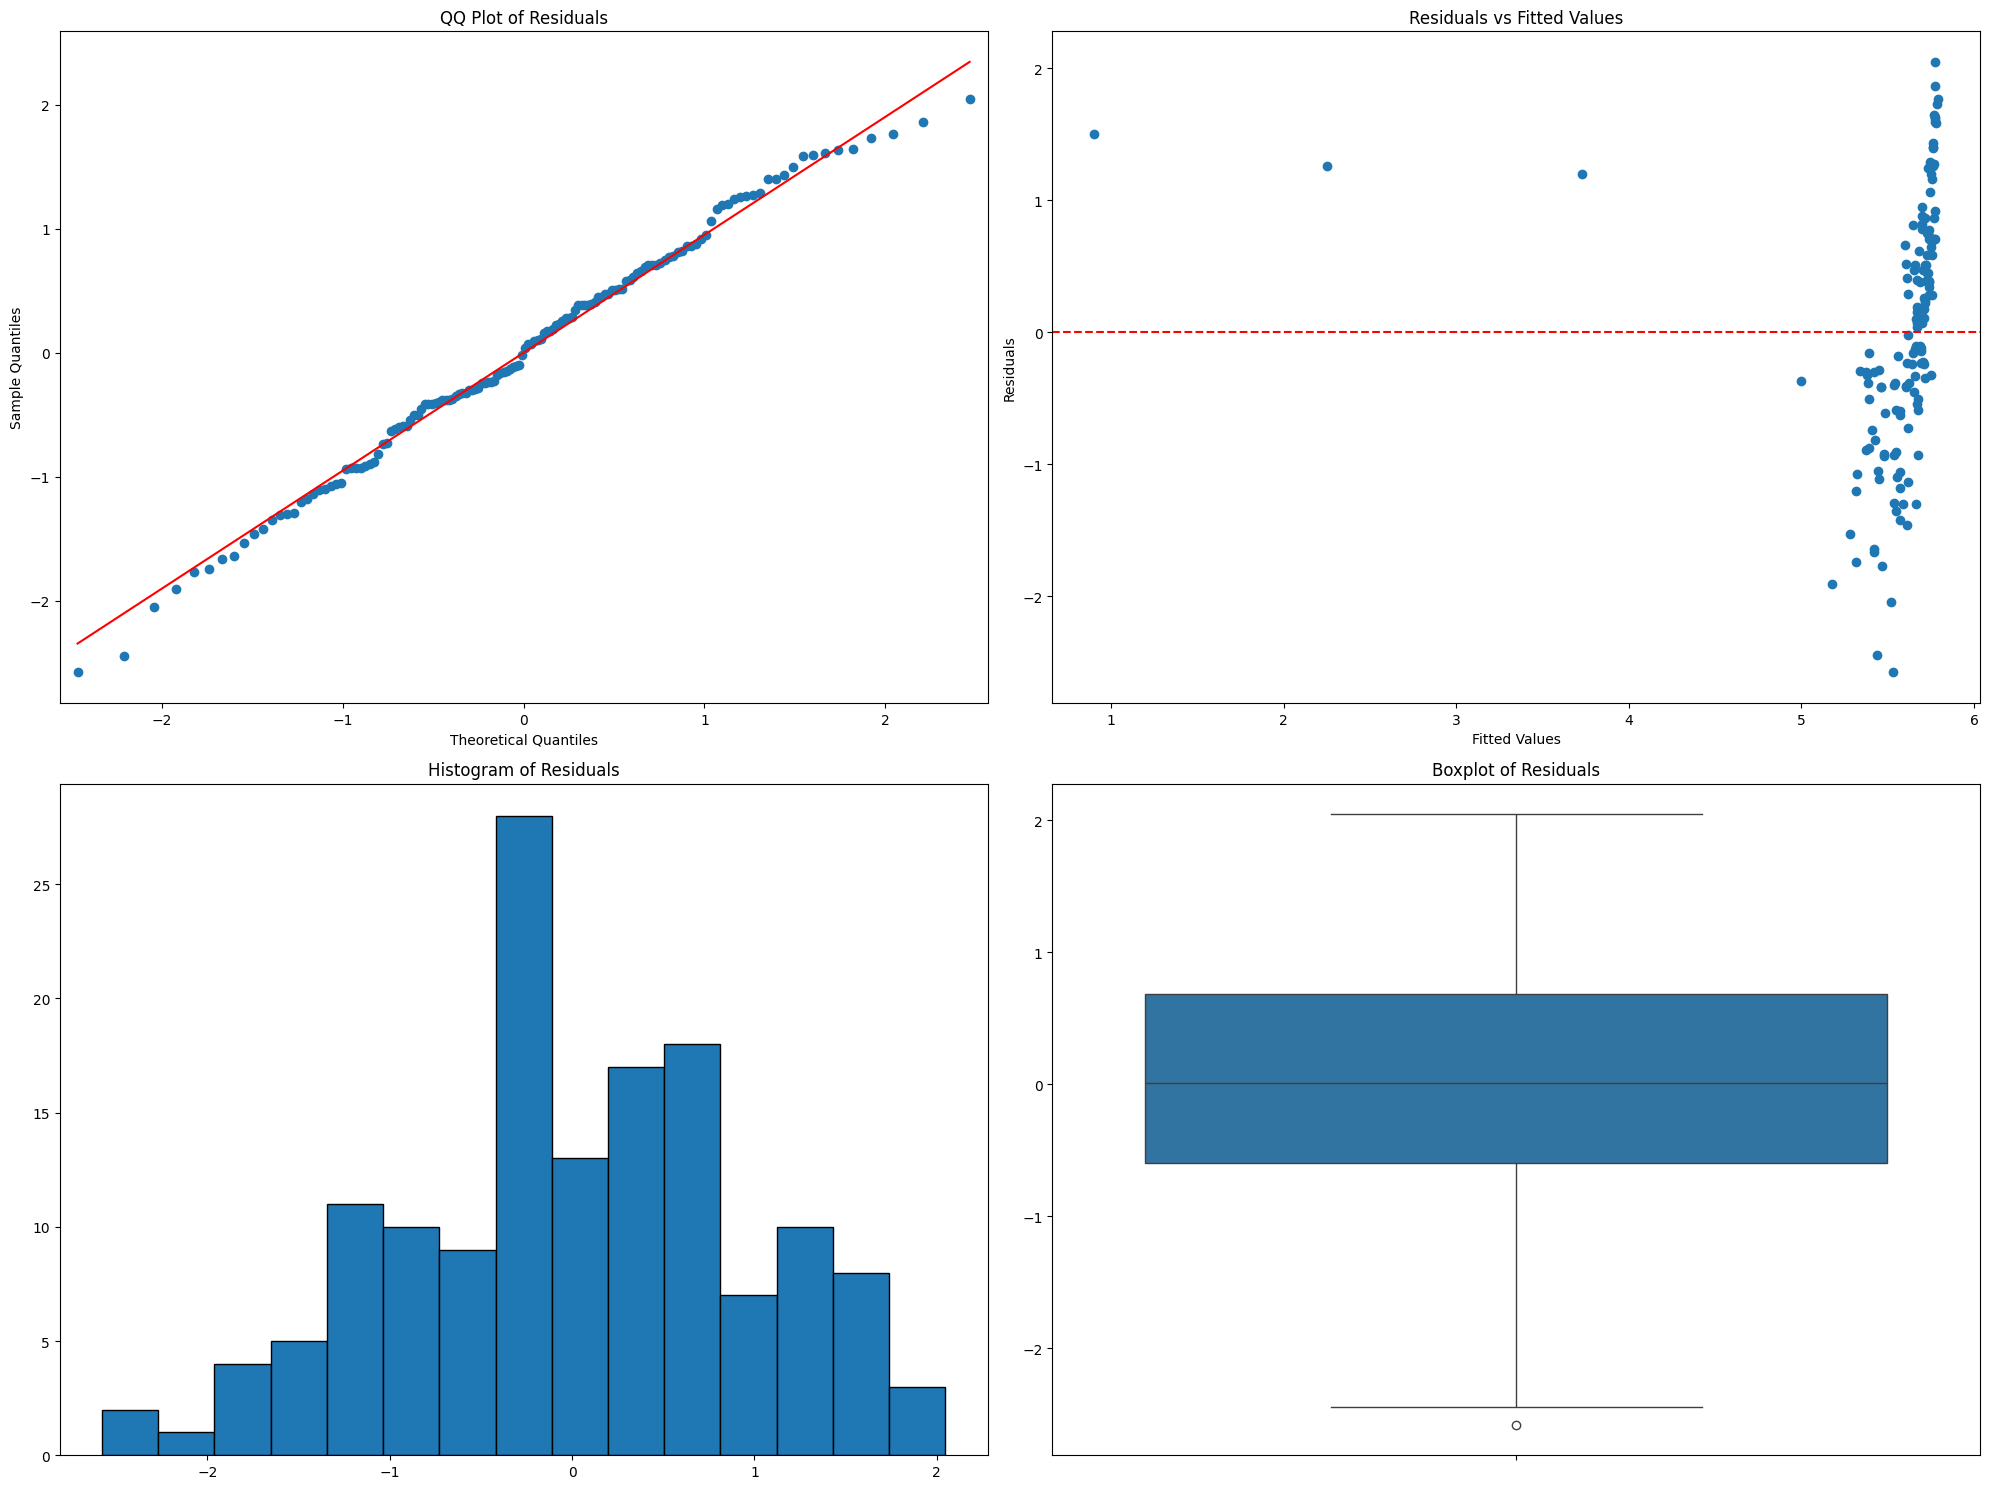

In [28]:
residuals = lm_trans_x.resid
fitted = lm_trans_x.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQ-plot** has points reasonably close to the line—both suggest that the **normality assumption seem plausible**.

- This plot of residuals versus fits shows that the residual variance **not equal**.


#### **Model - Y Transformation**

In [29]:
lm_trans_y = smf.ols("np.log(Happiness_score) ~ GDP_per_capita  + Social_support  + Healthy_life_expectancy", data = happy).fit()

In [30]:
lm_trans_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Happiness_score)   R-squared:                       0.686
Model:                                 OLS   Adj. R-squared:                  0.679
Method:                      Least Squares   F-statistic:                     103.2
Date:                     Sun, 31 Dec 2023   Prob (F-statistic):           1.69e-35
Time:                             13:19:11   Log-Likelihood:                 104.59
No. Observations:                      146   AIC:                            -201.2
Df Residuals:                          142   BIC:                            -189.3
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.0602      0.038     28.219      0.000       0.986       1.134
GDP_per_capita              0.0852      0.045      1.901      0.059      -0.003       0.174
Social_support              0.3536      0.052      6.750      0.000       0.250       0.457
Healthy_life_expectancy     0.3290      0.099      3.310      0.001       0.133       0.526
==============================================================================
Omnibus:                       24.620   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.318
Skew:                          -0.843   Prob(JB):                     2.90e-09
Kurtosis:                       4.902   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared and Adjusted R-squared:** R-squared is **0.686**, indicating that approximately **68.6%** of the variability in the natural logarithm of the happiness score is explained by the model.
The **adjusted R-squared (0.679)** accounts for the number of predictors in the model.

- **F-statistic and Prob (F-statistic)**:The F-statistic is 103.2 with a **very low p-value (1.69e-35)**, suggesting that **the model is statistically significant.**

- **Intercept:** The intercept is **1.0602**. In the context of the model, it represents the estimated value of the natural logarithm of the happiness score when all independent variables are zero.

- **GDP_per_capita:** A one-unit increase in **GDP_per_capita** is associated with a **0.0852** increase in the natural logarithm of the happiness score.

- **Social_support:** A one-unit increase in **Social_support** is associated with a **0.3536** increase in the natural logarithm of the happiness score.

- **Healthy_life_expectancy:** A one-unit increase in **Healthy_life_expectancy** is associated with a **0.3290** increase in the natural logarithm of the happiness score.

- **𝐻0: 𝛽1 = 𝛽2 = 0 Vs. 𝐻1: Not all 𝛽 s are zero**

- All coefficients have p-values less than **0.05**, suggesting that they are **statistically significant** **except the GDP_per_capita**. 



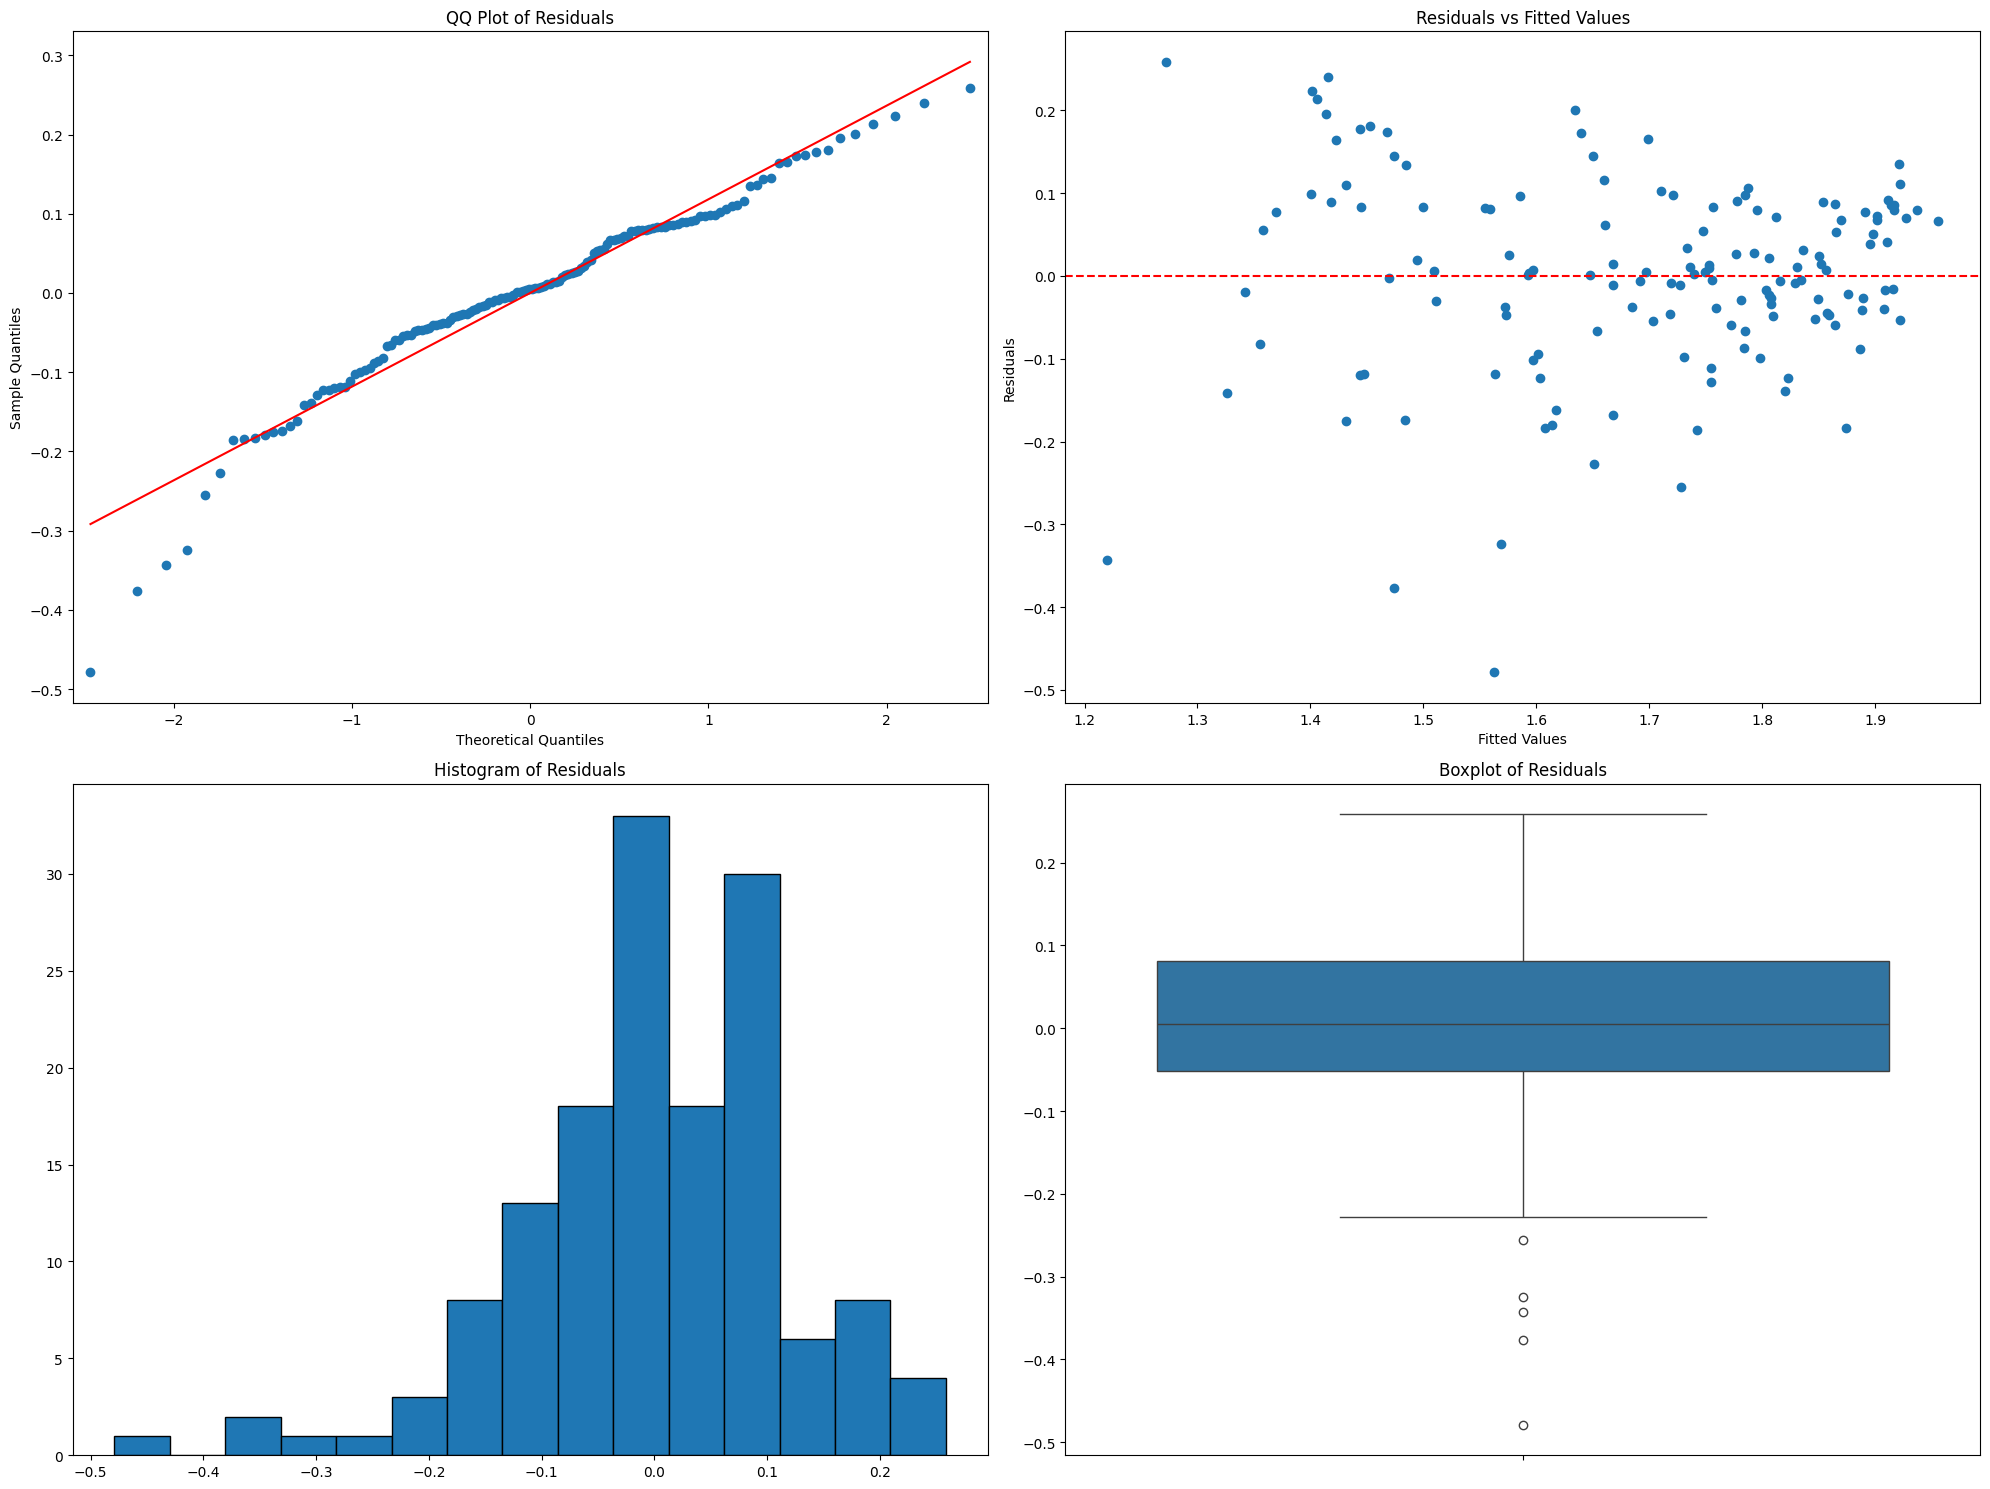

In [31]:
residuals = lm_trans_y.resid
fitted = lm_trans_y.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQ-plot** has points reasonably close to the line—both suggest that the **normality assumption seem plausible**.

- This plot of residuals versus fits shows that the **residual variance assumption seem plausible.**


#### **Model - with Y and X transformation**

In [32]:
lmv2 = smf.ols("np.log(Happiness_score) ~  np.log(GDP_per_capita + 1e-10) + np.log(Social_support + 1e-10) + np.log(Healthy_life_expectancy + 1e-10)", data = happy).fit()

In [33]:
lmv2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Happiness_score)   R-squared:                       0.293
Model:                                 OLS   Adj. R-squared:                  0.278
Method:                      Least Squares   F-statistic:                     19.63
Date:                     Sun, 31 Dec 2023   Prob (F-statistic):           1.06e-10
Time:                             13:19:13   Log-Likelihood:                 45.467
No. Observations:                      146   AIC:                            -82.93
Df Residuals:                          142   BIC:                            -71.00
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.7283      0.016    106.931      0.000       1.696       1.760
np.log(GDP_per_capita + 1e-10)              0.0144      0.008      1.882      0.062      -0.001       0.029
np.log(Social_support + 1e-10)              0.0471      0.008      6.114      0.000       0.032       0.062
np.log(Healthy_life_expectancy + 1e-10)     0.0300      0.008      3.792      0.000       0.014       0.046
==============================================================================
Omnibus:                       14.405   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.579
Skew:                          -0.735   Prob(JB):                     0.000414
Kurtosis:                       3.631   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared Value:** The R-squared value is **0.293**, indicating that approximately **29.3%** of the variability in the natural logarithm of the happiness score is explained by the model.
- **Adjusted R-squared:** The adjusted R-squared **(0.278)** accounts for the number of predictors in the model.

- **F-statistic and Prob (F-statistic)**:The F-statistic is 19.63 with a **very low p-value (1.06e-10)**, suggesting that **the model is statistically significant.**

- **Intercept:** The intercept is **1.7283**. In the context of the model, it represents the estimated natural logarithm of the happiness score when all independent variables are zero.

- **np.log(GDP_per_capita):** The coefficient is **0.0144**. A one-unit increase in the natural logarithm of GDP_per_capita is associated with a 0.0144 increase in the natural logarithm of the happiness score.

- **np.log(Social_support):** The coefficient is **0.0471**. A one-unit increase in the natural logarithm of Social_support is associated with a **0.0471** increase in the natural logarithm of the happiness score.

- **np.log(Healthy_life_expectancy):** The coefficient is **0.03**. A one-unit increase in the natural logarithm of Healthy_life_expectancy is associated with a **0.03 increase in the natural logarithm of the happiness score.

- **𝐻0: 𝛽1 = 𝛽2 = 0 Vs. 𝐻1: Not all 𝛽 s are zero**

- All coefficients have p-values less than **0.05**, suggesting that they are **statistically significant** **except the GDP_per_capita**. 


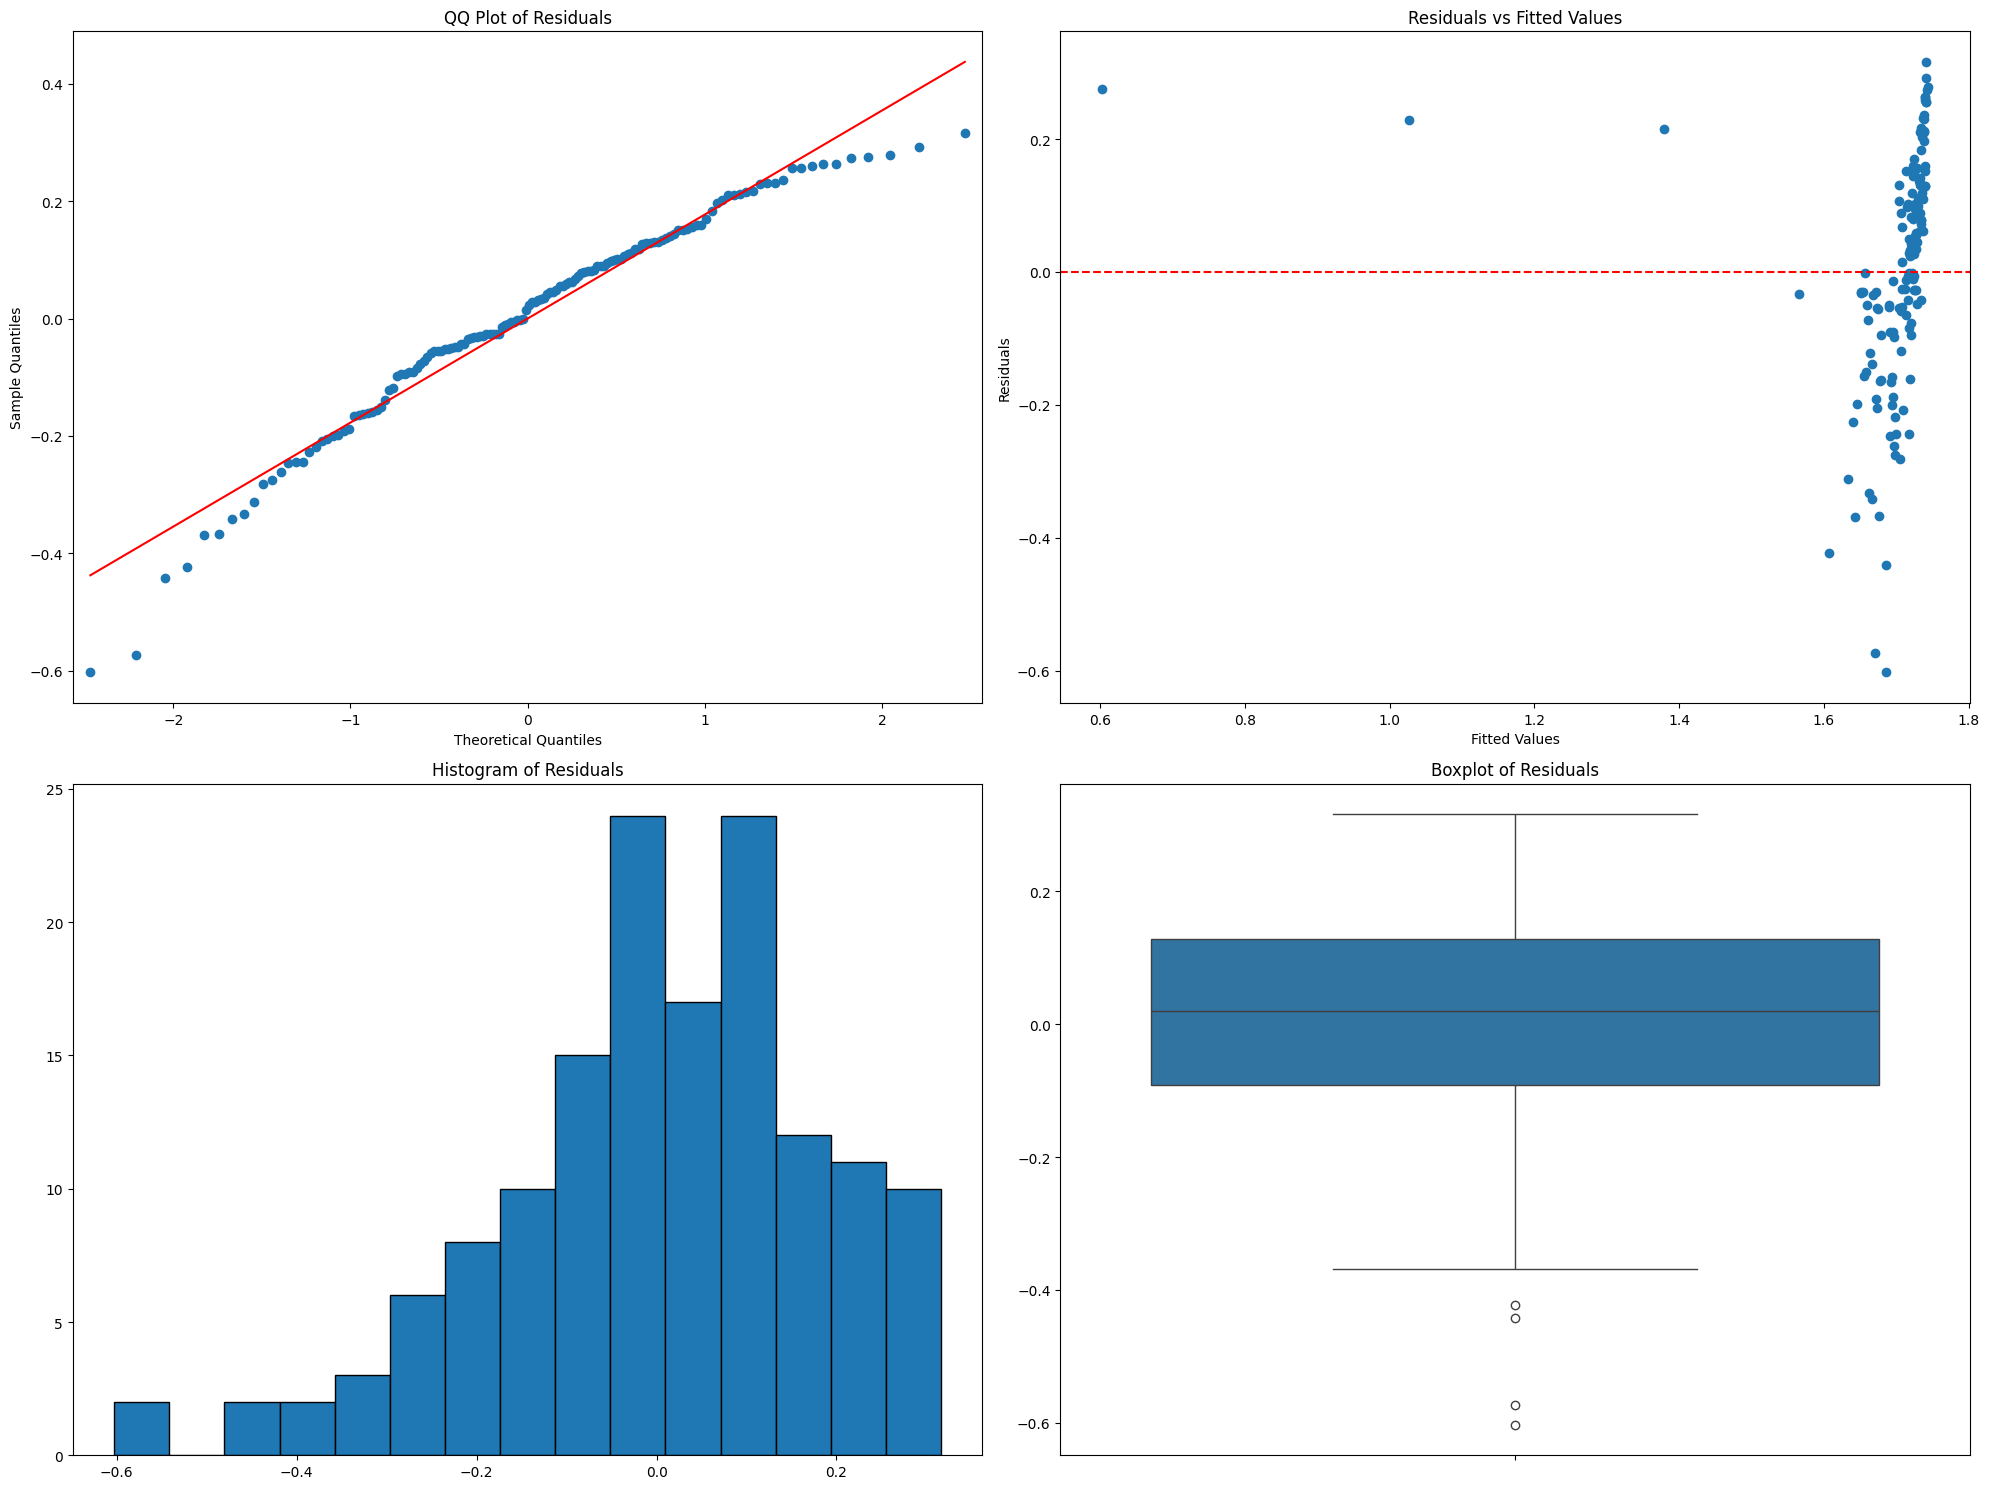

In [34]:
residuals = lmv2.resid
fitted = lmv2.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQplot** shows some deviation from the straight-line pattern indicating a distribution with **left skew** than a normal distribution.

- This plot of residuals versus fits shows that the residual variance **not equal**.

## **Outliers** ❌

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
influence = oi.OLSInfluence(lm_trans_y).summary_frame()
influence = influence[["cooks_d", "standard_resid", "hat_diag", "student_resid"]]
influence

,cooks_d,standard_resid,hat_diag,student_resid
0,0.006196,1.142326,0.018640,1.143564
1,0.004326,0.936434,0.019353,0.936026
2,0.001823,0.560495,0.022687,0.559137
3,0.002551,0.672939,0.022035,0.671637
4,0.002831,0.776878,0.018419,0.775788
...,...,...,...,...
141,0.179602,-2.823064,0.082689,-2.895535
142,0.031244,-1.231854,0.076092,-1.234121
143,0.085846,-3.195553,0.032533,-3.305346
144,0.182428,-4.082636,0.041943,-4.330311


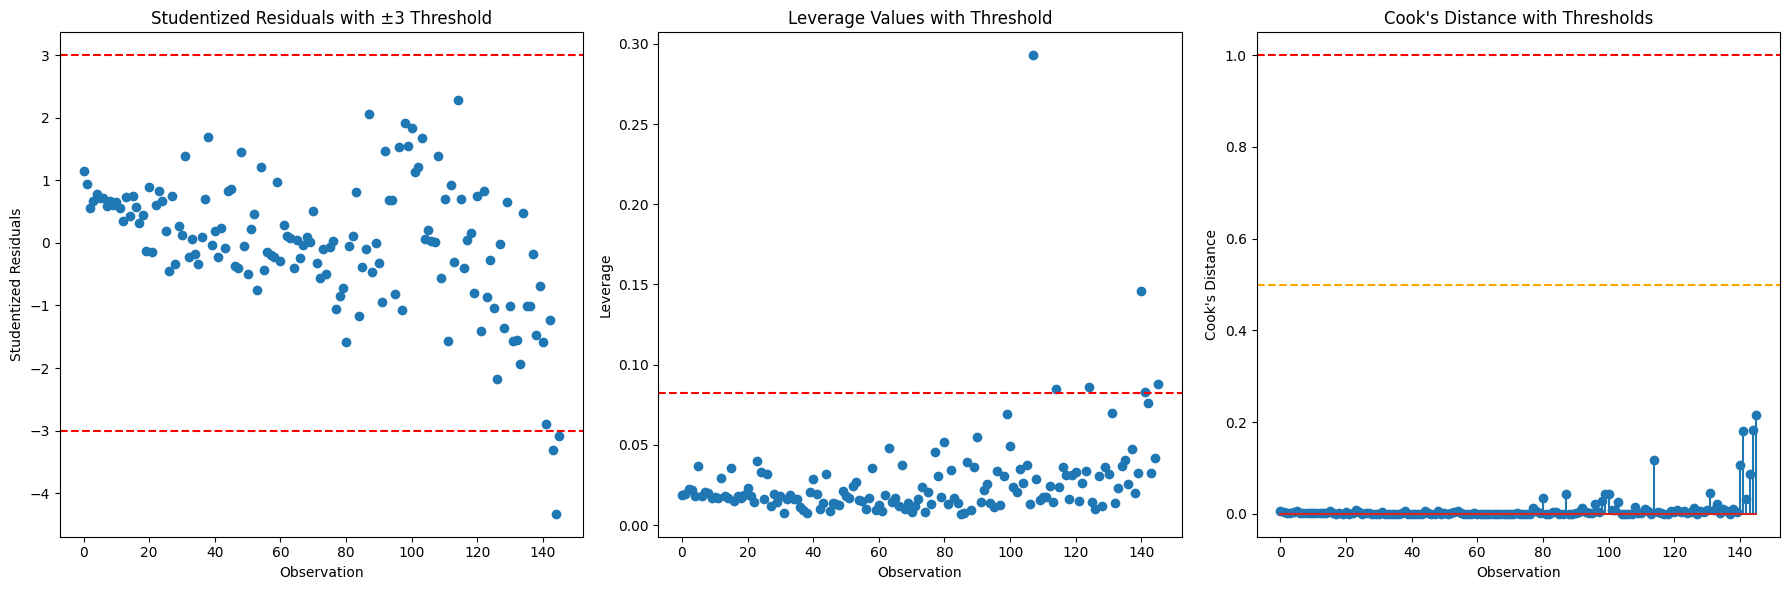

In [37]:
k = len(lm_trans_y.params) - 1  # subtracting 1 for the intercept
n = len(happy)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

In [38]:
percentiles = num_data.quantile([0.1, 0.9])

# Apply filtering for each column
for column in num_data.columns:
    low = percentiles.loc[0.1]
    high = percentiles.loc[0.9]
    happy_trans_y_without_outliers = num_data[(happy >= low) & (happy <= high)]

C:\Users\ZeyadaNet\AppData\Local\Temp\ipykernel_852\3190640798.py:7: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [39]:
happy_trans_y_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RANK                       116 non-null    float64
 1   Happiness_score            116 non-null    float64
 2   Whisker_high               116 non-null    float64
 3   Whisker_low                116 non-null    float64
 4   Dystopia_1.83_residual     116 non-null    float64
 5   GDP_per_capita             116 non-null    float64
 6   Social_support             116 non-null    float64
 7   Healthy_life_expectancy    116 non-null    float64
 8   Freedom                    116 non-null    float64
 9   Generosity                 116 non-null    float64
 10  Perceptions_of_corruption  117 non-null    float64
dtypes: float64(11)
memory usage: 12.7 KB


In [40]:
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(happy_trans_y_without_outliers)
imputed_data = pd.DataFrame(imputed_data,columns=happy_trans_y_without_outliers.columns)
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RANK                       146 non-null    float64
 1   Happiness_score            146 non-null    float64
 2   Whisker_high               146 non-null    float64
 3   Whisker_low                146 non-null    float64
 4   Dystopia_1.83_residual     146 non-null    float64
 5   GDP_per_capita             146 non-null    float64
 6   Social_support             146 non-null    float64
 7   Healthy_life_expectancy    146 non-null    float64
 8   Freedom                    146 non-null    float64
 9   Generosity                 146 non-null    float64
 10  Perceptions_of_corruption  146 non-null    float64
dtypes: float64(11)
memory usage: 12.7 KB


In [41]:
lm_trans_y_out = smf.ols("np.log(Happiness_score) ~   Social_support  + Healthy_life_expectancy", data = imputed_data).fit()

In [42]:
lm_trans_y_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Happiness_score)   R-squared:                       0.476
Model:                                 OLS   Adj. R-squared:                  0.469
Method:                      Least Squares   F-statistic:                     65.06
Date:                     Sun, 31 Dec 2023   Prob (F-statistic):           8.10e-21
Time:                             13:19:18   Log-Likelihood:                 151.47
No. Observations:                      146   AIC:                            -296.9
Df Residuals:                          143   BIC:                            -288.0
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2894      0.038     33.915      0.000       1.214       1.365
Social_support              0.3499      0.051      6.824      0.000       0.249       0.451
Healthy_life_expectancy     0.1609      0.075      2.141      0.034       0.012       0.309
==============================================================================
Omnibus:                        3.530   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.578
Skew:                          -0.366   Prob(JB):                        0.167
Kurtosis:                       2.773   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

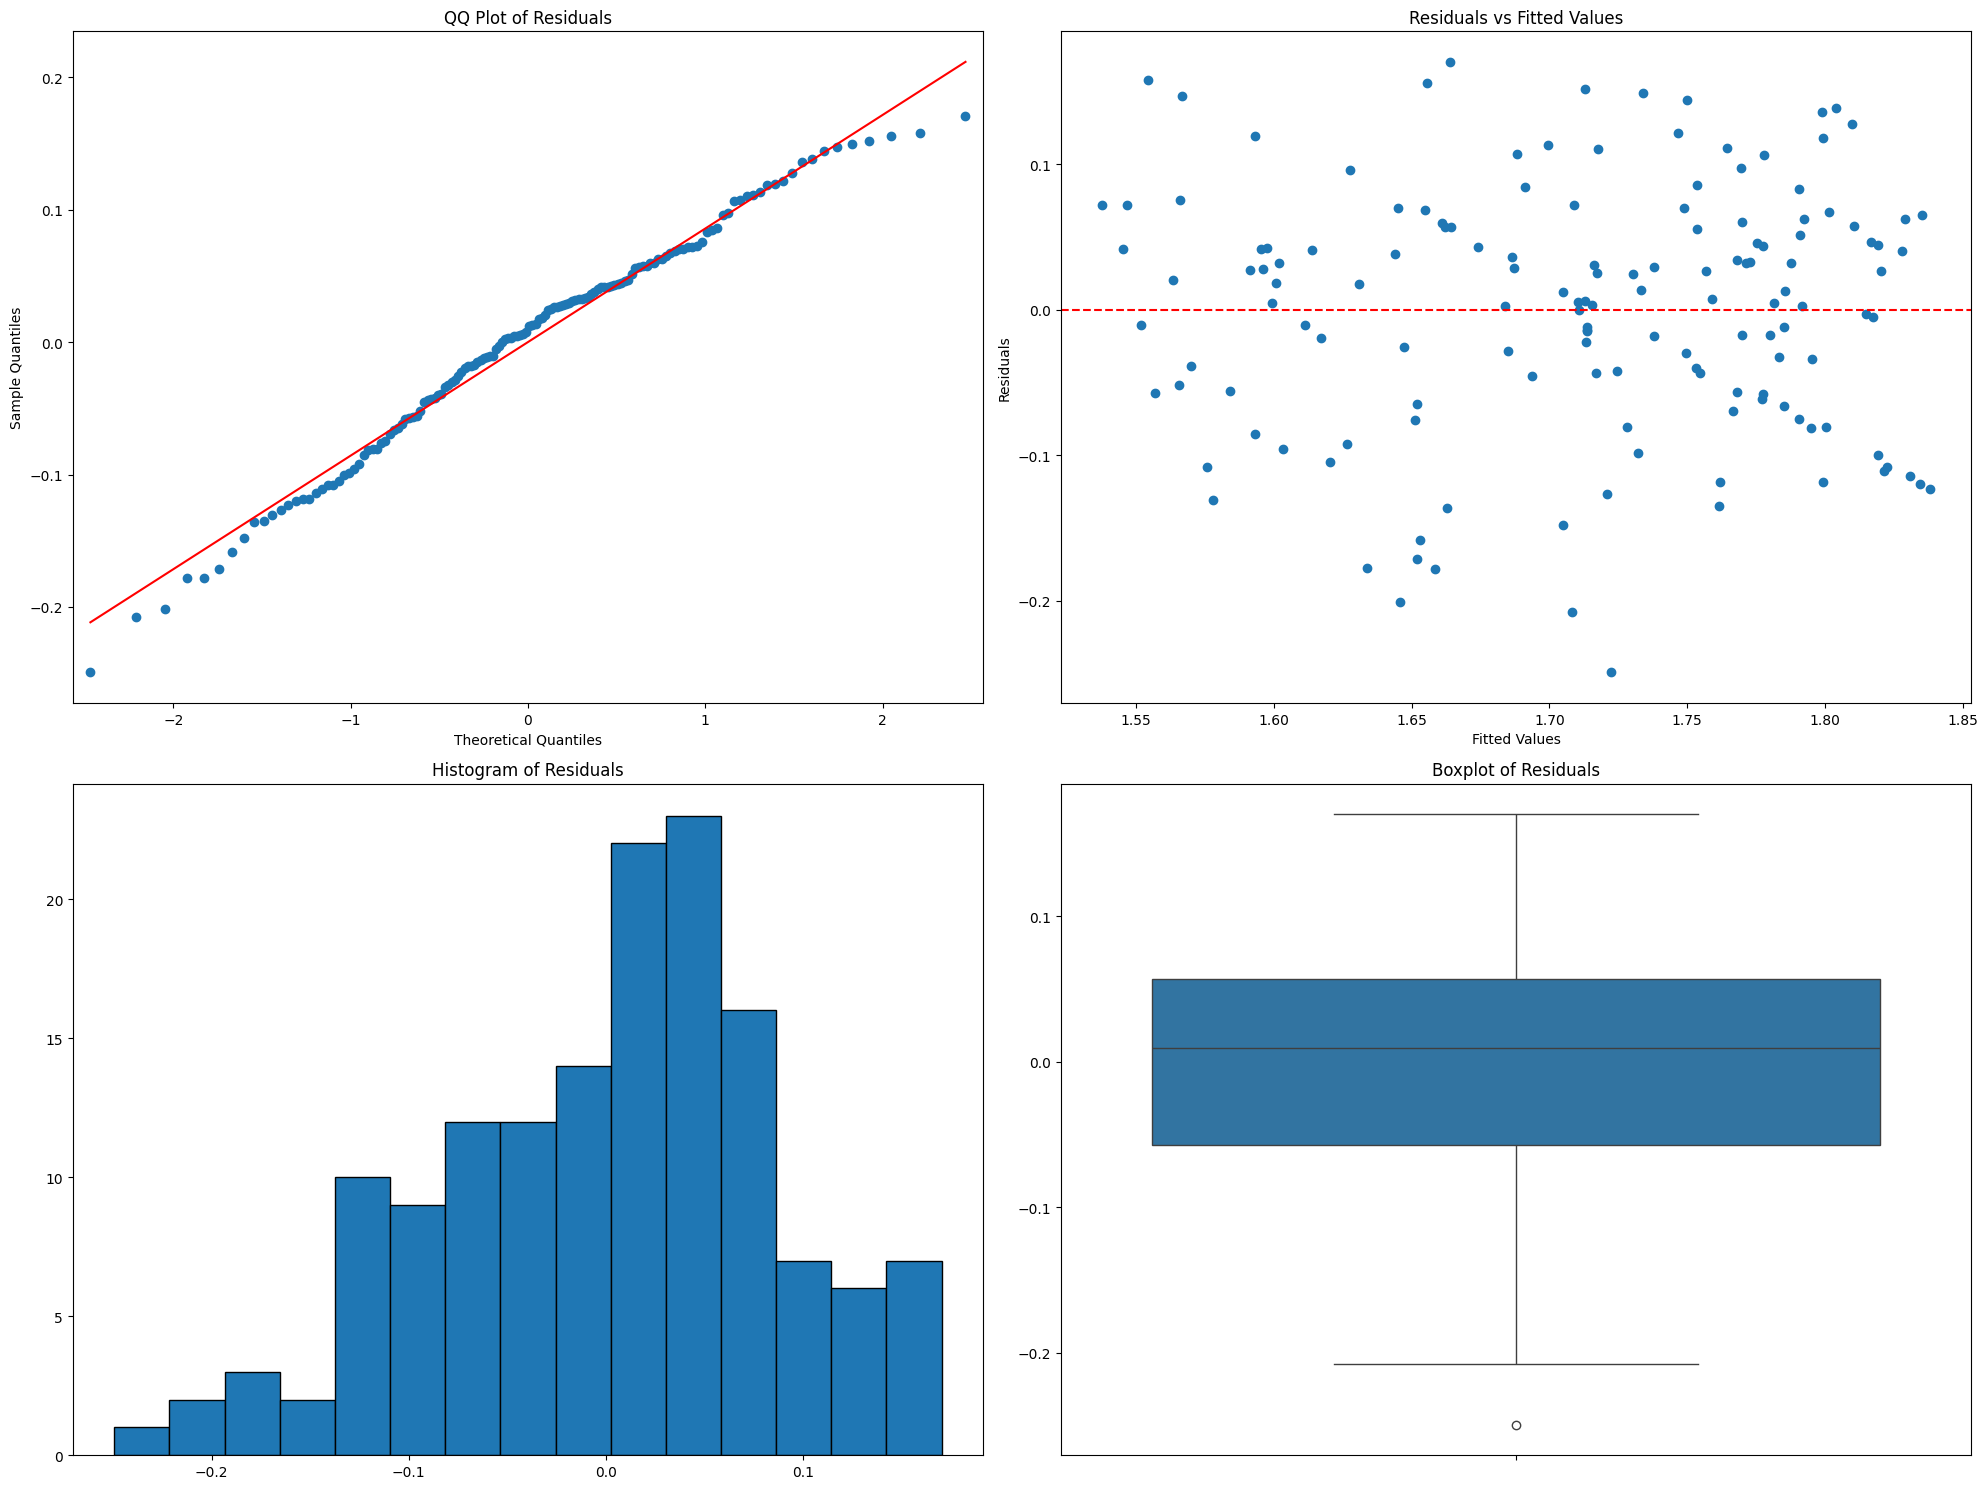

In [43]:
residuals = lm_trans_y_out.resid
fitted = lm_trans_y_out.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


In [44]:
x = imputed_data[[ "Social_support","Healthy_life_expectancy"]]
vif = [oi.variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

[36.17193334293519, 36.17193334293519]

In [45]:
w_model = smf.wls("np.log(Happiness_score) ~   Social_support+ Healthy_life_expectancy", data = imputed_data).fit()

In [46]:
w_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               WLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Happiness_score)   R-squared:                       0.476
Model:                                 WLS   Adj. R-squared:                  0.469
Method:                      Least Squares   F-statistic:                     65.06
Date:                     Sun, 31 Dec 2023   Prob (F-statistic):           8.10e-21
Time:                             13:19:20   Log-Likelihood:                 151.47
No. Observations:                      146   AIC:                            -296.9
Df Residuals:                          143   BIC:                            -288.0
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2894      0.038     33.915      0.000       1.214       1.365
Social_support              0.3499      0.051      6.824      0.000       0.249       0.451
Healthy_life_expectancy     0.1609      0.075      2.141      0.034       0.012       0.309
==============================================================================
Omnibus:                        3.530   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.578
Skew:                          -0.366   Prob(JB):                        0.167
Kurtosis:                       2.773   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
bp = ssd.het_breuschpagan(lm_trans_y_out.resid, lm_trans_y_out.model.exog)

In [48]:
bp_test_statistic, bp_p_value = bp[:2]
bp_test_statistic, bp_p_value

(0.9338538778035328, 0.6269258926334031)

- **Null Hypothesis (H0):** Homoscedasticity is present (the residuals are distributed with equal variance)
- **Alternative Hypothesis (HA):** Heteroscedasticity is present (the residuals are not distributed with equal variance)

- Fail to reject the **Null Hypothesis** and it means the residuals are not distributed with equal variance

## **ANOVA**

In [49]:
Anova_model = smf.ols('Happiness_score ~ continent', data=happy_loc).fit()

anova_table = sm.stats.anova_lm(Anova_model, typ=2)

print (anova_table)

              sum_sq     df          F        PR(>F)
continent  89.428788    6.0  25.312029  3.635112e-20
Residual   81.849106  139.0        NaN           NaN


- **The null hypothesis (H0)** there are no significant differences between the means of the groups.
- **The alternative hypothesis (H1)** is that at least one group mean is different.

- The p-value (PR(>F)) is **very small (3.635112e-20)**, much **less than 0.05**. **Reject the null hypothesis**.

## **Conclusion**

In the end, we concluded that there are many social and economic factors that affect happiness, such as freedom, healthy living, generosity, community support, and the country’s gross domestic product. We also noticed that countries that contain charming and picturesque natural landscapes are more likely to be happy.

GDP per capita: Higher GDP per capita is associated with higher happiness scores.

Social Support: Countries with stronger social support systems tend to have higher happiness scores.

Healthy Life Expectancy: Longer healthy life expectancy is positively correlated with happiness.

Freedom: More freedom is associated with higher happiness scores.

Generosity: While the coefficient for generosity is positive, the associated p-value is greater than 0.05, suggesting that generosity may not be a statistically significant predictor at the 0.05 significance level. However, it's mentioned that it's close, so it might still have some relevance.

Perceptions of Corruption: Similar to generosity, perceptions of corruption have a positive coefficient, but the associated p-value is greater than 0.05, indicating that it may not be statistically significant at the 0.05 significance level. Again, it's mentioned that it's close, so further investigation might be warranted.